# MPC Home assignments util resource
Python scripts to help solve and implement the home assignments from MPC. These assignments are used to confirm if the implemented MPC solver/scripts are working as expected.

In [52]:
import numpy as np
from scipy.linalg import expm
import sympy
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
x1, x2, x3, x4 = sympy.symbols('x1 x2 x3 x4')
a, b, p, q = sympy.symbols('a b p q')
c, r = sympy.symbols('c r')

nl_fx = np.array([[x2],[a*x4+b*sympy.sin(x1)], [x4], [p*x4+q*sympy.sin(x1)]])
nl_gx = np.array([[0],[c],[0],[r]])

In [ ]:
a = -0.9421
b = 82.7231
c = 14.2306
p = -3.7808
q = 4.9952
r = 57.1120

A_c = np.array([[0, 1, 0, 0],
                [b, 0, 0, a],
                [0, 0, 0, 1],
                [q, 0, 0, p]])

B_c = np.array([[0],[c],[0],[r]])

C_1 = np.array([[1, 0, 0, 0]])

h = 0.01

def convert_to_discrete(A_c: np.ndarray, B_c: np.ndarray, h: float):
    num_states = A_c.shape[0]
    num_inputs = B_c.shape[1]
    continuous_matrix = np.concat((A_c, B_c), axis=1)
    continuous_matrix = np.concat((continuous_matrix, np.zeros((1, num_states+num_inputs)))) * h

    discrete_matrix = expm(continuous_matrix)

    A_d = discrete_matrix[:num_states, :num_states]
    B_d = discrete_matrix[:num_states, num_states:]

    return A_d, B_d


A_d, B_d = convert_to_discrete(A_c, B_c, h)



(array([[ 1.00413823e+00,  1.00137909e-02,  0.00000000e+00,
         -4.65491539e-05],
        [ 8.28139307e-01,  1.00413823e+00,  0.00000000e+00,
         -9.25799940e-03],
        [ 2.46812794e-04,  8.25065584e-07,  1.00000000e+00,
          9.81331813e-03],
        [ 4.90877387e-02,  2.46812794e-04,  0.00000000e+00,
          9.62897030e-01]]),
 array([[0.00070313],
        [0.13984374],
        [0.00281998],
        [0.56046997]]))

In [50]:
def convert_np_to_cpp(M: np.ndarray):
    msg = "{"
    rows = M.shape[0]
    cols = M.shape[1]
    for i, row in enumerate(M):
        msg += "{"
        for j, col in enumerate(row):
            msg += f"{round(col, 4)}"
            if j < cols - 1:
                msg += ", "
        msg += "}"
        if i < rows - 1:
                msg += ",\n"
    msg += "}"
    print(msg)

convert_np_to_cpp(np.eye(4))

{{1.0, 0.0, 0.0, 0.0},
{0.0, 1.0, 0.0, 0.0},
{0.0, 0.0, 1.0, 0.0},
{0.0, 0.0, 0.0, 1.0}}


In [85]:
r1n40 = pd.read_csv("4_R_1.000000_N_40.csv")
r1n80 = pd.read_csv("4_R_1.000000_N_80.csv")
r01n40 = pd.read_csv("4_R_0.100000_N_40.csv")
r01n80 = pd.read_csv("4_R_0.100000_N_80.csv")

# data

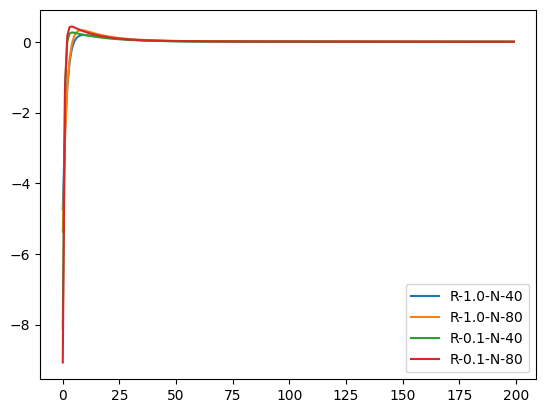

In [86]:
t = range(r1n80.shape[0])

value = "u"

plt.plot(t, r1n40[value], label="R-1.0-N-40")
plt.plot(t, r1n80[value], label="R-1.0-N-80")
plt.plot(t, r01n40[value], label="R-0.1-N-40")
plt.plot(t, r01n80[value], label="R-0.1-N-80")
plt.legend()